<a href="https://colab.research.google.com/github/mazi1444/Predict-Stock-Prices/blob/master/Predict_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instal the dependecies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [18]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX Historical Data(1).csv to NFLX Historical Data(1).csv


In [19]:
#Store the data in to the data frame

df = pd.read_csv("NFLX Historical Data(1).csv")
df.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 05, 2020",419.60,407.29,420.24,404.25,5.10M,1.27%
1,"Jun 04, 2020",414.33,421.98,428.57,410.16,5.41M,-1.81%
2,"Jun 03, 2020",421.97,426.71,426.77,418.23,4.32M,-1.25%
3,"Jun 02, 2020",427.31,425.77,427.51,419.52,3.49M,0.33%
4,"Jun 01, 2020",425.92,418.82,426.67,416.50,3.75M,1.47%
5,"May 29, 2020",419.73,417.46,420.30,411.85,5.27M,1.52%


In [20]:
#Get the numbers of trading days
df.shape



(529, 7)

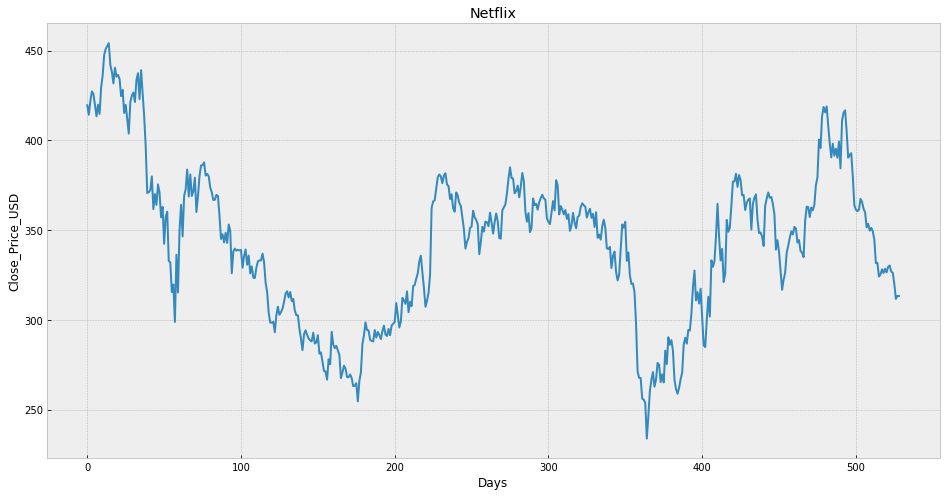

In [21]:
#Visualise the close price data

plt.figure(figsize=(16,8))
plt.title("Netflix")
plt.xlabel("Days")
plt.ylabel("Close_Price_USD")
plt.plot(df["Price"])
plt.show()

In [22]:
#Get the close price
df = df[["Price"]]
df.head(4)

,Price
0,419.60
1,414.33
2,421.97
3,427.31


In [24]:
#Create a variable to predict  "X" out in to the features

future_days = 25

#Create a new column(target) shifted "x" units/days up
df["Prediction"] = df[["Price"]].shift(-future_days)
df.head(4)


,Price,Prediction
0,419.60,419.85
1,414.33,411.89
2,421.97,403.83
3,427.31,421.38


In [25]:
#Create the feature data set (x) and convert it into numpy array and remove the last 'x' rows/days

X = np.array(df.drop(["Prediction"], 1))[:-future_days]
print(X)

[[419.6 ]
 [414.33]
 [421.97]
 [427.31]
 [425.92]
 [419.73]
 [413.44]
 [419.89]
 [414.77]
 [429.32]
 [436.25]
 [447.67]
 [451.04]
 [452.58]
 [454.19]
 [441.95]
 [438.27]
 [431.82]
 [440.52]
 [435.55]
 [436.53]
 [434.26]
 [424.68]
 [428.15]
 [415.27]
 [419.85]
 [411.89]
 [403.83]
 [421.38]
 [424.99]
 [426.7 ]
 [421.42]
 [433.83]
 [437.49]
 [422.96]
 [439.17]
 [426.75]
 [413.55]
 [396.72]
 [370.72]
 [371.12]
 [372.28]
 [379.96]
 [361.76]
 [370.08]
 [364.08]
 [375.5 ]
 [370.96]
 [357.12]
 [362.99]
 [342.39]
 [357.32]
 [360.27]
 [332.83]
 [332.03]
 [315.47]
 [319.75]
 [298.84]
 [336.3 ]
 [315.25]
 [349.92]
 [364.13]
 [346.49]
 [368.97]
 [372.78]
 [383.79]
 [368.77]
 [381.05]
 [369.03]
 [371.71]
 [379.24]
 [360.09]
 [368.7 ]
 [380.07]
 [386.  ]
 [386.19]
 [387.78]
 [380.4 ]
 [381.4 ]
 [380.01]
 [373.69]
 [371.07]
 [366.77]
 [366.95]
 [369.67]
 [369.01]
 [358.  ]
 [345.09]
 [347.74]
 [343.16]
 [348.52]
 [342.88]
 [353.16]
 [349.6 ]
 [326.  ]
 [338.11]
 [339.67]
 [338.62]
 [339.07]
 [338.69]


In [27]:
#Create the target data set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df["Prediction"])[:-future_days]
print(y)

[419.85 411.89 403.83 421.38 424.99 426.7  421.42 433.83 437.49 422.96
 439.17 426.75 413.55 396.72 370.72 371.12 372.28 379.96 361.76 370.08
 364.08 375.5  370.96 357.12 362.99 342.39 357.32 360.27 332.83 332.03
 315.47 319.75 298.84 336.3  315.25 349.92 364.13 346.49 368.97 372.78
 383.79 368.77 381.05 369.03 371.71 379.24 360.09 368.7  380.07 386.
 386.19 387.78 380.4  381.4  380.01 373.69 371.07 366.77 366.95 369.67
 369.01 358.   345.09 347.74 343.16 348.52 342.88 353.16 349.6  326.
 338.11 339.67 338.62 339.07 338.69 338.92 329.05 335.66 339.26 330.75
 335.83 325.9  329.81 323.57 323.31 329.09 332.63 333.2  333.1  336.9
 332.22 320.8  315.48 304.21 298.5  298.44 298.93 293.12 302.5  307.35
 302.86 304.32 306.16 309.99 314.66 315.93 312.49 315.55 310.48 311.69
 305.16 302.6  302.57 295.03 289.62 283.11 292.01 294.18 291.57 289.57
 288.59 288.03 292.86 286.81 287.41 291.45 281.21 281.86 276.82 271.5
 271.27 266.69 278.05 275.3  293.35 286.28 284.25 285.53 282.93 280.48
 267.53 270.

In [28]:
#Split the data into 75% training and 25% in testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
#Create the models
#Create the Decision Tree Regression Model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear Regression model
lr = LinearRegression().fit(x_train, y_train)


In [31]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(["Prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[418.65],
       [415.63],
       [418.97],
       [408.25],
       [398.39],
       [390.52],
       [398.18],
       [391.43],
       [395.42],
       [390.39],
       [399.39],
       [384.48],
       [411.09],
       [415.44],
       [416.76],
       [404.98],
       [390.4 ],
       [391.98],
       [392.87],
       [379.93],
       [363.83],
       [361.45],
       [360.57],
       [361.4 ],
       [367.45]])

In [33]:
#Show the model tree prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[359.93 361.81 359.93 351.6  351.29 349.73 351.29 329.6  344.72 331.62
 331.82 324.18 325.22 362.99 326.13 328.53 326.46 329.6  330.3  326.89
 326.26 320.09 311.69 313.36 313.3 ]

[369.75337283 368.43660378 369.89289803 365.21880393 360.91968379
 357.48823597 360.82812038 357.88501075 359.62471555 357.43155386
 361.35570003 354.85469788 366.45709005 368.3537607  368.92930214
 363.79303082 357.43591402 358.12481968 358.51287414 352.87082398
 345.8509625  344.81324384 344.42954955 344.79144303 347.42934129]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


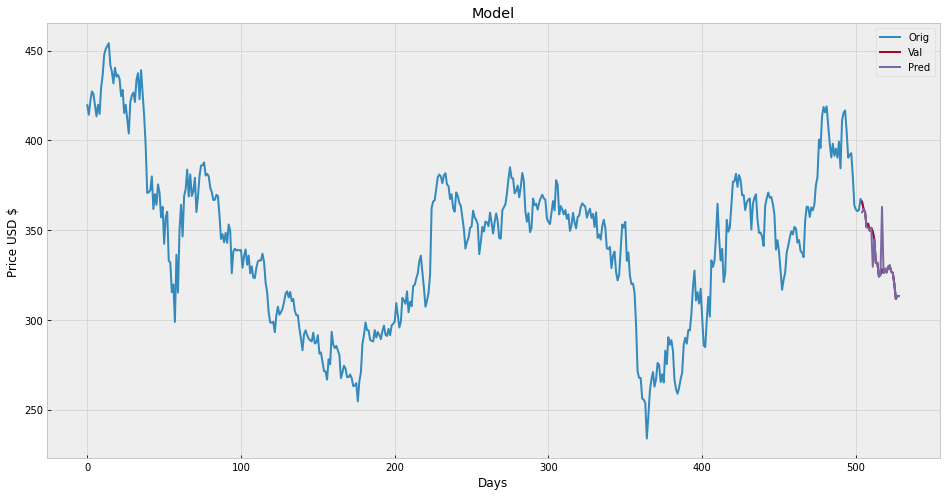

In [34]:
#Visualised the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Price USD $")
plt.plot(df["Price"])
plt.plot(valid[["Price", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


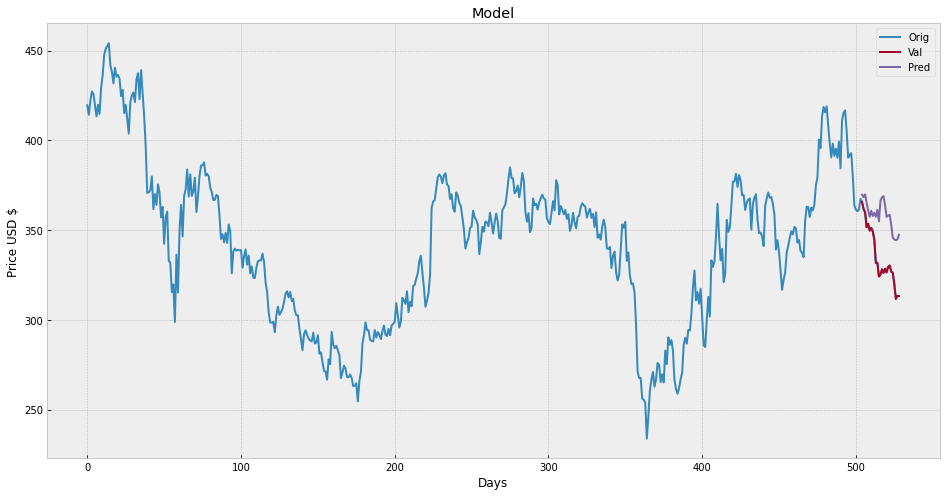

In [35]:
#Visualised the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Price USD $")
plt.plot(df["Price"])
plt.plot(valid[["Price", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()